# Food Categories:  PREDICTION
### 101 food types

In [1]:
import fastai
fastai.show_install(0)



```text
=== Software === 
python version  : 3.6.5
fastai version  : 1.0.18
torch version   : 1.0.0.dev20181022
nvidia driver   : 396.44
torch cuda ver  : 9.2.148
torch cuda is   : available
torch cudnn ver : 7104
torch cudnn is  : enabled

=== Hardware === 
nvidia gpus     : 1
torch available : 1
  - gpu0        : 7611MB | Tesla P4

=== Environment === 
platform        : Linux-4.9.0-8-amd64-x86_64-with-debian-9.5
distro          : #1 SMP Debian 4.9.110-3+deb9u6 (2018-10-08)
conda env       : Unknown
python          : /opt/anaconda3/bin/python
sys.path        : 
/opt/anaconda3/lib/python36.zip
/opt/anaconda3/lib/python3.6
/opt/anaconda3/lib/python3.6/lib-dynload
/opt/anaconda3/lib/python3.6/site-packages
/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions
/home/jupyter/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be ins

In [2]:
import glob
from io import BytesIO
import numpy as np

In [3]:
from fastai import *
from fastai.vision import *

In [4]:
path = Path('../data/subset')

## Final model to load in 

In [5]:
final_model_name = 'resnet34-stage-2'

## Predicting for New Images

In [6]:
classes = ['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [7]:
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load(final_model_name)

## Test Images

### Test Images:  Food Items in Training Data

In [30]:
url = "https://www.seriouseats.com/recipes/images/2014/09/20140812-apricot-ribs-step-7-joshua-bousel.jpg"

In [9]:
url = "https://www.maangchi.com/wp-content/uploads/2008/01/dolsotbibimbap-stove.jpg"

In [10]:
url = "https://d3cizcpymoenau.cloudfront.net/images/25879/SFS_Baklava_026.jpg"

In [40]:
# apple pie
url = "https://www.seriouseats.com/recipes/images/2015/11/20151124-gooey-apple-pie-recipe-40-1500x1125.jpg"

### Test Images:  Food Items NOT IN Training Data

In [17]:
# apple
url = "https://image.shutterstock.com/image-photo/red-apple-isolated-on-white-260nw-1191769966.jpg"

In [35]:
# banana
url = "https://image.shutterstock.com/image-photo/single-banana-isolated-260nw-575528569.jpg"

### Test Images:  Fake

In [11]:
# table
url = "https://image.shutterstock.com/image-photo/brown-light-wooden-round-dining-260nw-588358070.jpg"

In [25]:
# twitter logo
url = "https://upload.wikimedia.org/wikipedia/fr/thumb/c/c8/Twitter_Bird.svg/1259px-Twitter_Bird.svg.png"

## Run Test

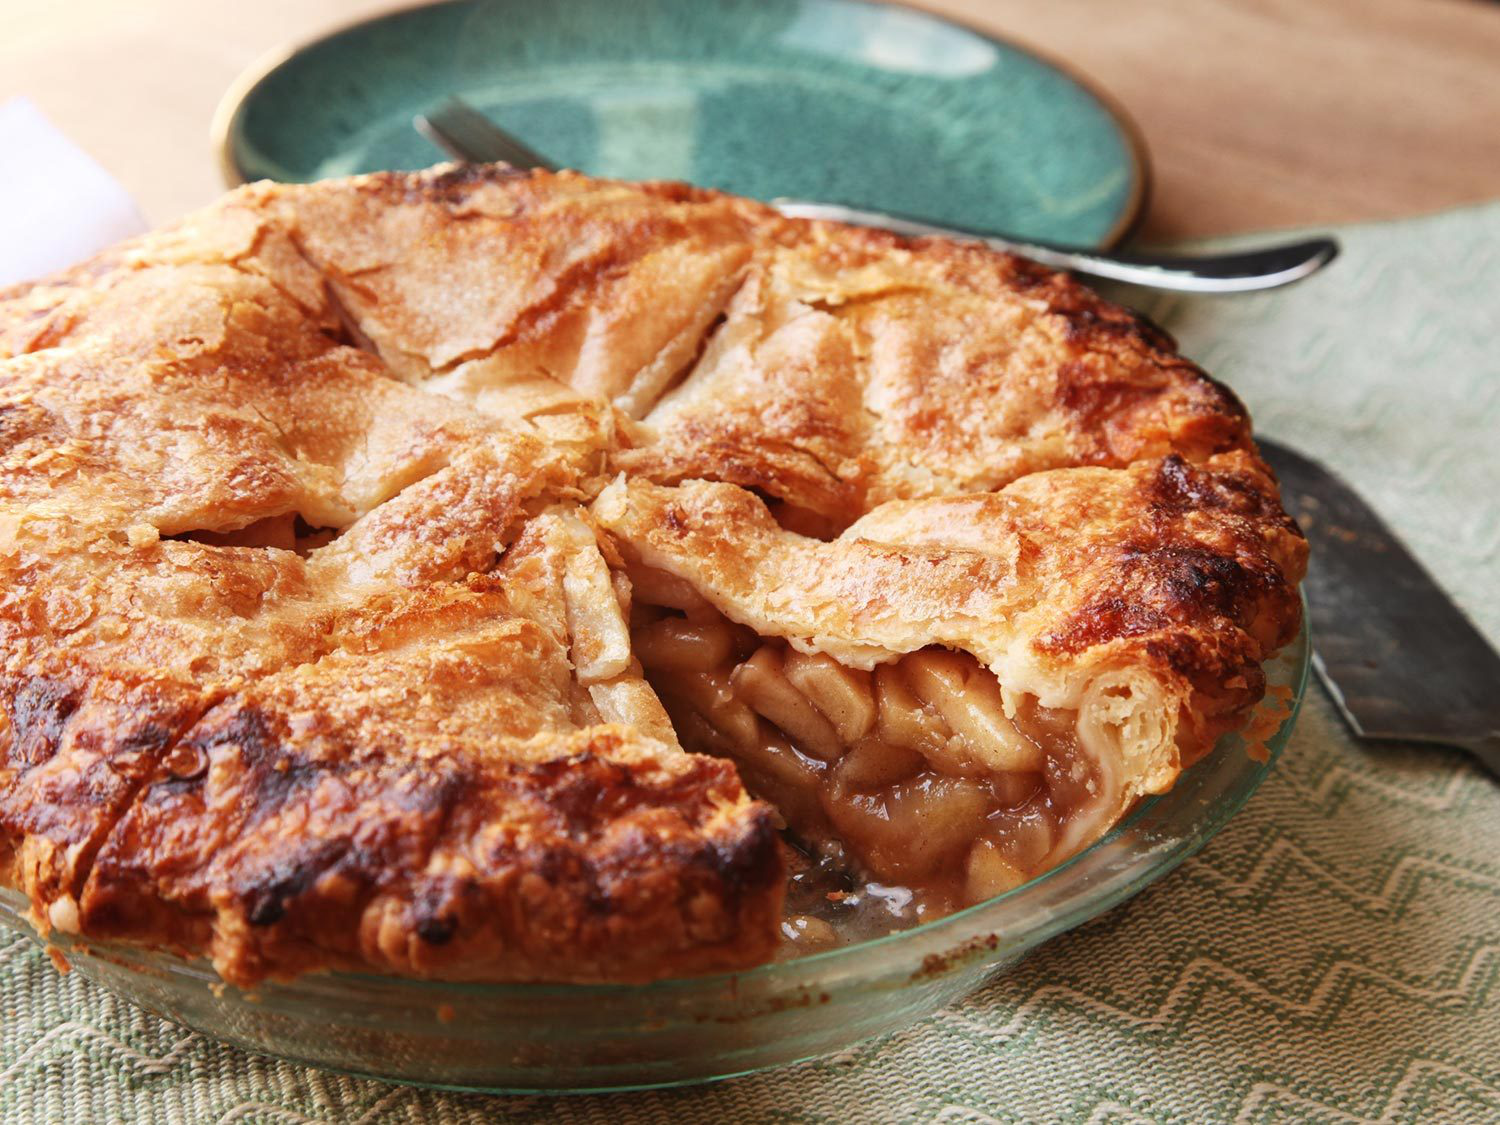

In [41]:
response = requests.get(url)
img = open_image(BytesIO(response.content))
img

In [42]:
pred_class, pred_idx, outputs = learn.predict(img)

In [43]:
res =  zip (learn.data.classes, outputs.tolist())
sorted(res, key=lambda x:x[1], reverse=True) 

[('apple_pie', 2972.591796875),
 ('bread_pudding', 10.326518058776855),
 ('beignets', 2.792041301727295),
 ('baklava', 1.6990715265274048),
 ('beef_tartare', 1.0169428586959839),
 ('baby_back_ribs', 0.33772632479667664),
 ('breakfast_burrito', 0.21726661920547485),
 ('bibimbap', 0.028756730258464813),
 ('beef_carpaccio', 0.027824904769659042),
 ('beet_salad', 0.0027198505122214556)]

In [44]:
learn.predict(img)

('apple_pie',
 tensor(0),
 tensor([2.9726e+03, 3.3773e-01, 1.6991e+00, 2.7825e-02, 1.0169e+00, 2.7199e-03,
         2.7920e+00, 2.8757e-02, 1.0327e+01, 2.1727e-01]))